In [1]:
%%capture
!pip install textblob

In [2]:
import pandas as pd
from textblob import TextBlob
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt 

In [3]:
#To gather the articles in this study we used a crawler and a scraper. We attached pdf's with examples of each of these to our email
#so that you can see how they worked.
#The articles for each region are loaded
ne = pd.read_csv('NewEngland.csv')
la= pd.read_csv("LowerAtlantic.csv")
mw = pd.read_csv('MidWest.csv')
gc = pd.read_csv('GulfCoast.csv')
rm = pd.read_csv('RockyMountains.csv')
ma=pd.read_csv('MidAtlantic.csv')
wc=pd.read_csv('WestCoast.csv')

In [4]:
#originally we each took responsibility for gather articles and preforming sentiment analysis for a different region, so there were actually 7
#workbooks. After performing sentiment analysis we combined all the regions into one dataframe  for topic modeling. THh sentiment analysis steps in
#this workbook are repetitive, but we thought that was the best way to show that sentiment analysis was preformed on each region individually.

#The Sources, headlines, and articles are turned into strings
ne['Source'] = ne['Source'].astype("string")
ne['Head_Line'] = ne['Head_Line'].astype("string")
ne['Article'] = ne['Article'].astype("string")

la['Source'] = la['Source'].astype("string")
la['Head_Line'] = la['Head_Line'].astype("string")
la['Article'] = la['Article'].astype("string")

mw['Source'] = mw['Source'].astype("string")
mw['Head_Line'] = mw['Head_Line'].astype("string")
mw['Article'] = mw['Article'].astype("string")

gc['Source'] = gc['Source'].astype("string")
gc['Head_Line'] = gc['Head_Line'].astype("string")
gc['Article'] = gc['Article'].astype("string")

rm['Source'] = rm['Source'].astype("string")
rm['Head_Line'] = rm['Head_Line'].astype("string")
rm['Article'] = rm['Article'].astype("string")

ma['Source'] = ma['Source'].astype("string")
ma['Head_Line'] = ma['Head_Line'].astype("string")
ma['Article'] = ma['Article'].astype("string")

wc['Source'] = wc['Source'].astype("string")
wc['Head_Line'] = wc['Head_Line'].astype("string")
wc['Article'] = wc['Article'].astype("string")

In [5]:
#We run TextBlob.sentiment on each article
ne['valance']=ne['Article'].apply(lambda Article: TextBlob(Article).sentiment)

la['valance']=la['Article'].apply(lambda Article: TextBlob(Article).sentiment)

mw['valance']=mw['Article'].apply(lambda Article: TextBlob(Article).sentiment)

gc['valance']=gc['Article'].apply(lambda Article: TextBlob(Article).sentiment)

rm['valance']=rm['Article'].apply(lambda Article: TextBlob(Article).sentiment)

ma['valance']=ma['Article'].apply(lambda Article: TextBlob(Article).sentiment)

wc['valance']=wc['Article'].apply(lambda Article: TextBlob(Article).sentiment)

In [6]:
#We convert the valance into a string
ne['valance'] = ne['valance'].astype("string")
la['valance'] = la['valance'].astype("string")
mw['valance'] = mw['valance'].astype("string")
gc['valance'] = gc['valance'].astype("string")
rm['valance'] = rm['valance'].astype("string")
ma['valance'] = ma['valance'].astype("string")
wc['valance'] = wc['valance'].astype("string")

#We removed the parentheses
ne["valance"]=ne.valance.str.replace('(', '')
ne["valance"]=ne.valance.str.replace(')', '')

la["valance"]=la.valance.str.replace('(', '')
la["valance"]=la.valance.str.replace(')', '')

mw["valance"]=mw.valance.str.replace('(', '')
mw["valance"]=mw.valance.str.replace(')', '')

gc["valance"]=gc.valance.str.replace('(', '')
gc["valance"]=gc.valance.str.replace(')', '')

rm["valance"]=rm.valance.str.replace('(', '')
rm["valance"]=rm.valance.str.replace(')', '')

ma["valance"]=ma.valance.str.replace('(', '')
ma["valance"]=ma.valance.str.replace(')', '')

wc["valance"]=wc.valance.str.replace('(', '')
wc["valance"]=wc.valance.str.replace(')', '')

#We split Polarity and Subjectivity into seperate columns and drop unneeded characters
fixne= ne['valance'].str.split(",",expand=True)
fixne.rename(columns= {0 :'Polarity',1:"Subjectivity"}, inplace = True)
fixne["Polarity"]=fixne.Polarity.str.replace('Sentimentpolarity=', '')
fixne["Subjectivity"]=fixne.Subjectivity.str.replace('subjectivity=', '')

fixla= la['valance'].str.split(",",expand=True)
fixla.rename(columns= {0 :'Polarity',1:"Subjectivity"}, inplace = True)
fixla["Polarity"]=fixla.Polarity.str.replace('Sentimentpolarity=', '')
fixla["Subjectivity"]=fixla.Subjectivity.str.replace('subjectivity=', '')

fixmw= mw['valance'].str.split(",",expand=True)
fixmw.rename(columns= {0 :'Polarity',1:"Subjectivity"}, inplace = True)
fixmw["Polarity"]=fixmw.Polarity.str.replace('Sentimentpolarity=', '')
fixmw["Subjectivity"]=fixmw.Subjectivity.str.replace('subjectivity=', '')

fixgc= gc['valance'].str.split(",",expand=True)
fixgc.rename(columns= {0 :'Polarity',1:"Subjectivity"}, inplace = True)
fixgc["Polarity"]=fixgc.Polarity.str.replace('Sentimentpolarity=', '')
fixgc["Subjectivity"]=fixgc.Subjectivity.str.replace('subjectivity=', '')

fixrm= rm['valance'].str.split(",",expand=True)
fixrm.rename(columns= {0 :'Polarity',1:"Subjectivity"}, inplace = True)
fixrm["Polarity"]=fixrm.Polarity.str.replace('Sentimentpolarity=', '')
fixrm["Subjectivity"]=fixrm.Subjectivity.str.replace('subjectivity=', '')

fixma= ma['valance'].str.split(",",expand=True)
fixma.rename(columns= {0 :'Polarity',1:"Subjectivity"}, inplace = True)
fixma["Polarity"]=fixma.Polarity.str.replace('Sentimentpolarity=', '')
fixma["Subjectivity"]=fixma.Subjectivity.str.replace('subjectivity=', '')

fixwc= wc['valance'].str.split(",",expand=True)
fixwc.rename(columns= {0 :'Polarity',1:"Subjectivity"}, inplace = True)
fixwc["Polarity"]=fixwc.Polarity.str.replace('Sentimentpolarity=', '')
fixwc["Subjectivity"]=fixwc.Subjectivity.str.replace('subjectivity=', '')

#We then join the renamed columns to the original dataframe
ne= pd.concat([ne,fixne], axis =1,)

la= pd.concat([la,fixla], axis =1,)

mw= pd.concat([mw,fixmw], axis =1,)

gc= pd.concat([gc,fixgc], axis =1,)

rm= pd.concat([rm,fixrm], axis =1,)

ma= pd.concat([ma,fixma], axis =1,)

wc= pd.concat([wc,fixwc], axis =1,)

#We then drop the columns I don't need
ne.drop('valance', axis = 1, inplace = True)
la.drop('valance', axis = 1, inplace = True)
mw.drop('valance', axis = 1, inplace = True)
gc.drop('valance', axis = 1, inplace = True)
rm.drop('valance', axis = 1, inplace = True)
ma.drop('valance', axis = 1, inplace = True)
wc.drop('valance', axis = 1, inplace = True)
#We Then convert the scores back to floats
ne['Polarity'] = ne['Polarity'].astype("float")
ne['Subjectivity'] = ne['Subjectivity'].astype("float")

la['Polarity'] = la['Polarity'].astype("float")
la['Subjectivity'] = la['Subjectivity'].astype("float")

mw['Polarity'] = mw['Polarity'].astype("float")
mw['Subjectivity'] = mw['Subjectivity'].astype("float")

gc['Polarity'] = gc['Polarity'].astype("float")
gc['Subjectivity'] = gc['Subjectivity'].astype("float")

rm['Polarity'] = rm['Polarity'].astype("float")
rm['Subjectivity'] = rm['Subjectivity'].astype("float")

ma['Polarity'] = ma['Polarity'].astype("float")
ma['Subjectivity'] = ma['Subjectivity'].astype("float")

wc['Polarity'] = wc['Polarity'].astype("float")
wc['Subjectivity'] = wc['Subjectivity'].astype("float")

C:\Users\t_jud\AppData\Local\Temp\ipykernel_22796\2081572894.py:11: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  ne["valance"]=ne.valance.str.replace('(', '')
C:\Users\t_jud\AppData\Local\Temp\ipykernel_22796\2081572894.py:12: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  ne["valance"]=ne.valance.str.replace(')', '')
C:\Users\t_jud\AppData\Local\Temp\ipykernel_22796\2081572894.py:14: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  la["valance"]=la.valance.str.replace('(', '')
C:\Users\t_jud\AppData\Local\Temp\ipykernel_22

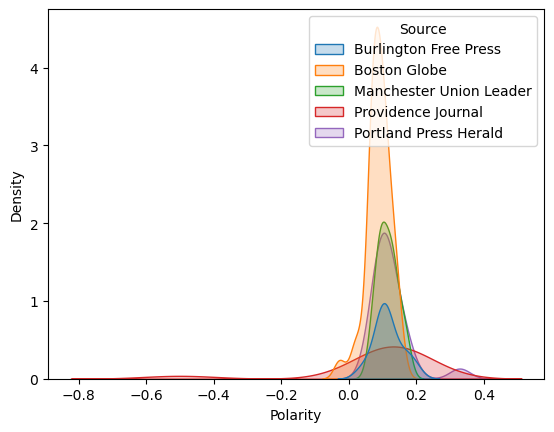

In [7]:
#We Plot Polarity for New England
sns.kdeplot(data=ne, x="Polarity", hue="Source",  fill=True)

plt.show()

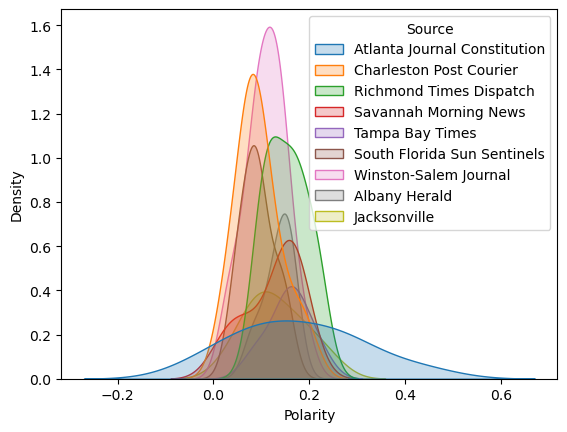

In [8]:
#We plot Polarity for Lower Atlantic
sns.kdeplot(data=la, x="Polarity", hue="Source",  fill=True)

plt.show()

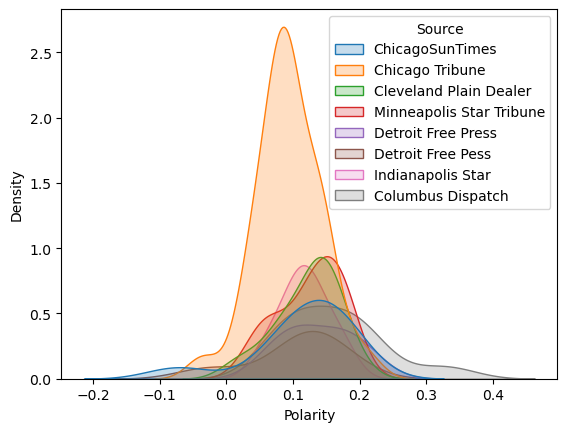

In [9]:
#We Plot Polarity for the Mid West
sns.kdeplot(data=mw, x="Polarity", hue="Source",  fill=True)

plt.show()

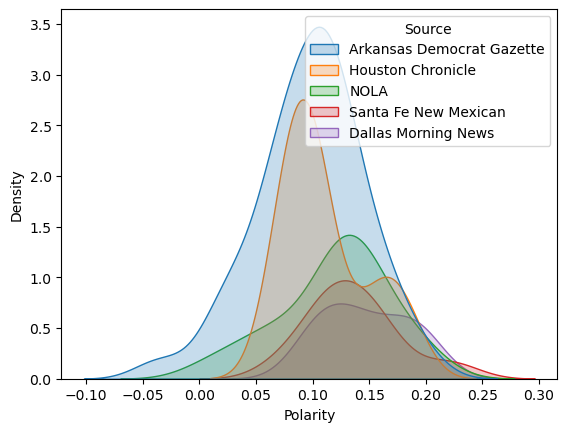

In [10]:
#We Plot Polarity for the Gulf Coast
sns.kdeplot(data=gc, x="Polarity", hue="Source",  fill=True)

plt.show()

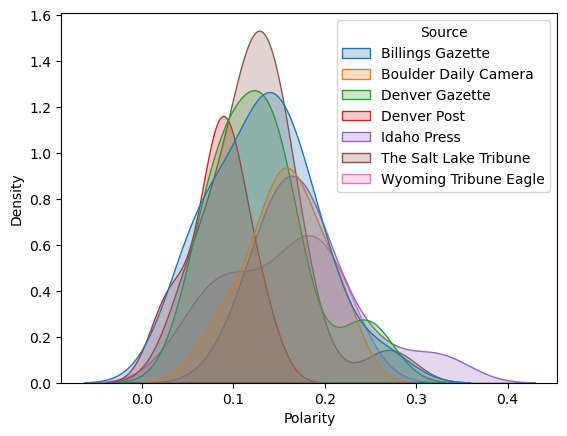

In [11]:
#We Plot Polarity for the Rocky Mountains
sns.kdeplot(data=rm, x="Polarity", hue="Source",  fill=True)

plt.show()

C:\Users\t_jud\AppData\Local\Temp\ipykernel_22796\1722786569.py:2: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=ma, x="Polarity", hue="Source",  fill=True)


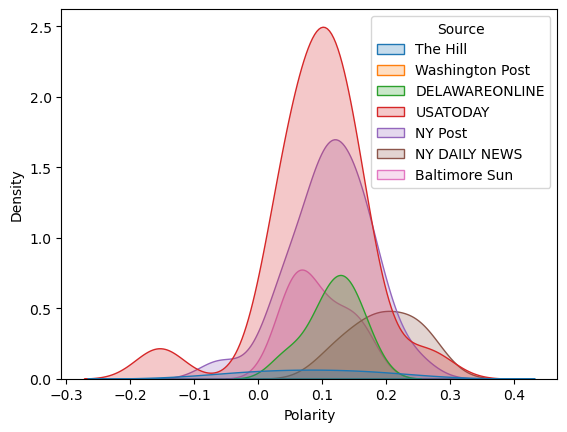

In [12]:
#We Plot Polarity for the Mid Atlantic
sns.kdeplot(data=ma, x="Polarity", hue="Source",  fill=True)

plt.show()

C:\Users\t_jud\AppData\Local\Temp\ipykernel_22796\287114652.py:2: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=wc, x="Polarity", hue="Source",  fill=True)


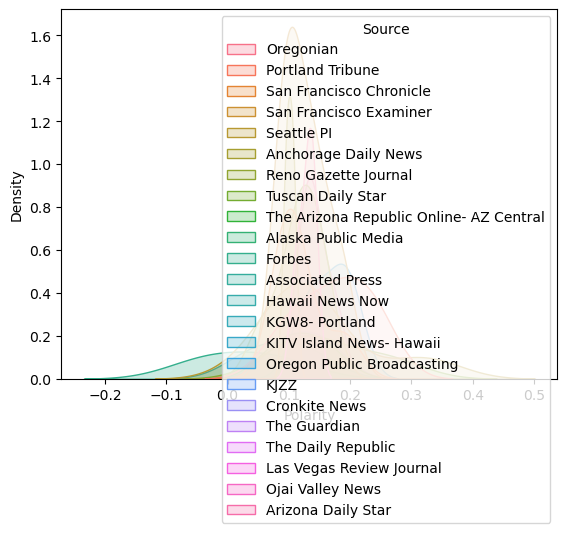

In [13]:
# We Plot Polarity for the West Coast
sns.kdeplot(data=wc, x="Polarity", hue="Source",  fill=True)

plt.show()

In [14]:
!pip install transformers

In [15]:
!pip install TensorFlow

In [16]:
from transformers import AutoTokenizer, TFAutoModelForSequenceClassification,  pipeline

In [17]:
#Using BERT we perform sentiment analysis for each headline, creating columns for the label and score
model_name = "bert-base-multilingual-uncased"
model= TFAutoModelForSequenceClassification.from_pretrained(model_name)
tokenizer= AutoTokenizer.from_pretrained(model_name)
classifier = pipeline('sentiment-analysis', model=model, tokenizer=tokenizer)

ne['sentiment']=ne['Head_Line'].apply(lambda Head_Line: classifier(Head_Line))
#We convert the sentiment to a string
ne['sentiment'] = ne['sentiment'].astype("string")


#We remove unneeded characters
ne["sentiment"]=ne.sentiment.str.replace('[', '')
ne["sentiment"]=ne.sentiment.str.replace(']', '')
ne["sentiment"]=ne.sentiment.str.replace('{', '')
ne["sentiment"]=ne.sentiment.str.replace('}', '')
ne["sentiment"]=ne.sentiment.str.replace("'label':", '')
ne["sentiment"]=ne.sentiment.str.replace("'score':", '')
ne["sentiment"]=ne.sentiment.str.replace("'LABEL_", '')
ne["sentiment"]=ne.sentiment.str.replace("'", '')

#We split the strings into seperate columns in an new dataframe and then concat them onto the original dataframe
fixxne= ne['sentiment'].str.split(",",expand=True)
fixxne.rename(columns= {0 :'HL_Label',1:"HL_Score"}, inplace = True)
ne= pd.concat([ne,fixxne], axis =1,)

#we then drop the columns I don't need
ne.drop('sentiment', axis = 1, inplace = True)
#we then convert the label to an int and the score to a float
ne['HL_Label'] = ne['HL_Label'].astype("int")
ne['HL_Score'] = ne['HL_Score'].astype("float")

All model checkpoint layers were used when initializing TFBertForSequenceClassification.

Some layers of TFBertForSequenceClassification were not initialized from the model checkpoint at bert-base-multilingual-uncased and are newly initialized: ['classifier']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
C:\Users\t_jud\AppData\Local\Temp\ipykernel_22796\2681851653.py:13: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  ne["sentiment"]=ne.sentiment.str.replace('[', '')
C:\Users\t_jud\AppData\Local\Temp\ipykernel_22796\2681851653.py:14: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  ne["sentiment"]=ne.sentiment.str.re

In [18]:
ne.head()

,Source,Head_Line,Article,Region,Polarity,Subjectivity,HL_Label,HL_Score
0,Burlington Free Press,Plugging into change: Electric vehicle chargin...,A statewide push to bring more chargers for Ve...,New England,0.103902,0.267923,1,0.536900
1,Burlington Free Press,Now's your chance to find out what it's like t...,Ever wonder what it's like to drive an electri...,New England,0.098703,0.461628,1,0.538984
2,Burlington Free Press,Efficiency Vermont turns its attention to elec...,Efficiency Vermont plans to do for electric ve...,New England,0.137987,0.378211,1,0.536595
3,Burlington Free Press,Electric cars: Sweet ride or sacred cow?,"Ordinarily, electric and gas-electric hybrid c...",New England,0.100955,0.442225,1,0.539523
4,Burlington Free Press,Electric vehicles no green solution,I'd like to thank the Free Press for printing ...,New England,0.105746,0.536844,1,0.539903


In [19]:
#Using BERT we perform sentiment analysis for each headline, creating columns for the label and score
model_name = "bert-base-multilingual-uncased"
model= TFAutoModelForSequenceClassification.from_pretrained(model_name)
tokenizer= AutoTokenizer.from_pretrained(model_name)
classifier = pipeline('sentiment-analysis', model=model, tokenizer=tokenizer)

la['sentiment']=la['Head_Line'].apply(lambda Head_Line: classifier(Head_Line))
#We convert the sentiment to a string
la['sentiment'] = la['sentiment'].astype("string")


#We remove unneeded characters
la["sentiment"]=la.sentiment.str.replace('[', '')
la["sentiment"]=la.sentiment.str.replace(']', '')
la["sentiment"]=la.sentiment.str.replace('{', '')
la["sentiment"]=la.sentiment.str.replace('}', '')
la["sentiment"]=la.sentiment.str.replace("'label':", '')
la["sentiment"]=la.sentiment.str.replace("'score':", '')
la["sentiment"]=la.sentiment.str.replace("'LABEL_", '')
la["sentiment"]=la.sentiment.str.replace("'", '')

#We split the strings into seperate columns in an new dataframe and then concat them onto the original dataframe
fixxla= la['sentiment'].str.split(",",expand=True)
fixxla.rename(columns= {0 :'HL_Label',1:"HL_Score"}, inplace = True)
la= pd.concat([la,fixxla], axis =1,)

#we then drop the columns I don't need
la.drop('sentiment', axis = 1, inplace = True)
#we then convert the label to an int and the score to a float
la['HL_Label'] = la['HL_Label'].astype("int")
la['HL_Score'] = la['HL_Score'].astype("float")

All model checkpoint layers were used when initializing TFBertForSequenceClassification.

Some layers of TFBertForSequenceClassification were not initialized from the model checkpoint at bert-base-multilingual-uncased and are newly initialized: ['classifier']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
C:\Users\t_jud\AppData\Local\Temp\ipykernel_22796\1325087736.py:12: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  la["sentiment"]=la.sentiment.str.replace('[', '')
C:\Users\t_jud\AppData\Local\Temp\ipykernel_22796\1325087736.py:13: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  la["sentiment"]=la.sentiment.str.re

In [20]:
la.head()

,Source,Head_Line,Article,Region,Article_l,Polarity,Subjectivity,HL_Label,HL_Score
0,Atlanta Journal Constitution,Ask Clark: Do You Have Advice on Buying a Used...,"Welcome to Ask Clark, a column designed to ans...",Lower Atlantic,1985,0.260947,0.459213,0,0.573300
1,Atlanta Journal Constitution,Electric car makers battle Georgia auto dealer...,Credit: TNSCredit: TNSElectric car manufacture...,Lower Atlantic,6677,0.134899,0.424918,0,0.573893
2,Atlanta Journal Constitution,Why Clark Howard Doesn’t Think You Should Buy ...,More and more people are opting for electric v...,Lower Atlantic,2835,0.174951,0.481213,0,0.556783
3,Atlanta Journal Constitution,New Report: The Best Hybrid and Electric Cars,As the major U.S. automakers make moves to piv...,Lower Atlantic,1966,0.421748,0.359473,0,0.582485
4,Atlanta Journal Constitution,Report: The #1 Electric Vehicle for Customer S...,The rankings come from J.D. Power's first-ever...,Lower Atlantic,1475,0.268806,0.466771,0,0.566787


In [21]:
#Using BERT we perform sentiment analysis for each headline, creating columns for the label and score
model_name = "bert-base-multilingual-uncased"
model= TFAutoModelForSequenceClassification.from_pretrained(model_name)
tokenizer= AutoTokenizer.from_pretrained(model_name)
classifier = pipeline('sentiment-analysis', model=model, tokenizer=tokenizer)

mw['sentiment']=mw['Head_Line'].apply(lambda Head_Line: classifier(Head_Line))
#We convert the sentiment to a string
mw['sentiment'] = mw['sentiment'].astype("string")


#We remove unneeded characters
mw["sentiment"]=mw.sentiment.str.replace('[', '')
mw["sentiment"]=mw.sentiment.str.replace(']', '')
mw["sentiment"]=mw.sentiment.str.replace('{', '')
mw["sentiment"]=mw.sentiment.str.replace('}', '')
mw["sentiment"]=mw.sentiment.str.replace("'label':", '')
mw["sentiment"]=mw.sentiment.str.replace("'score':", '')
mw["sentiment"]=mw.sentiment.str.replace("'LABEL_", '')
mw["sentiment"]=mw.sentiment.str.replace("'", '')

#We split the strings into seperate columns in an new dataframe and then concat them onto the original dataframe
fixxmw= mw['sentiment'].str.split(",",expand=True)
fixxmw.rename(columns= {0 :'HL_Label',1:"HL_Score"}, inplace = True)
mw= pd.concat([mw,fixxmw], axis =1,)

#we then drop the columns I don't need
mw.drop('sentiment', axis = 1, inplace = True)
#we then convert the label to an int and the score to a float
mw['HL_Label'] = mw['HL_Label'].astype("int")
mw['HL_Score'] = mw['HL_Score'].astype("float")


All model checkpoint layers were used when initializing TFBertForSequenceClassification.

Some layers of TFBertForSequenceClassification were not initialized from the model checkpoint at bert-base-multilingual-uncased and are newly initialized: ['classifier']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
C:\Users\t_jud\AppData\Local\Temp\ipykernel_22796\3416354151.py:12: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  mw["sentiment"]=mw.sentiment.str.replace('[', '')
C:\Users\t_jud\AppData\Local\Temp\ipykernel_22796\3416354151.py:13: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  mw["sentiment"]=mw.sentiment.str.re

In [22]:
mw.head()

,Source,Head_Line,Article,Region,Polarity,Subjectivity,HL_Label,HL_Score
0,ChicagoSunTimes,Electric vehicle makers target compact SUVs to...,The 2024 Chevrolet SS EV — one of the new crop...,MidWest,0.155730,0.431177,0,0.516044
1,ChicagoSunTimes,Companies charge forward with electrified vehi...,Automakers will be looking to spark interest i...,MidWest,0.086478,0.369817,0,0.513360
2,ChicagoSunTimes,"Your teen’s first car: A low cost, low upkeep ...",stock.adobe.comWhen auto expert Dan Edmunds wa...,MidWest,0.073396,0.436026,0,0.520482
3,ChicagoSunTimes,It’s time to switch to electric vehicles - Chi...,GM’s all-new modular platform and battery syst...,MidWest,0.130462,0.371524,0,0.523287
4,ChicagoSunTimes,"Sliding gas prices may zap electric, hybrid sa...",BMW is sounding a warning about sliding gas pr...,MidWest,-0.071919,0.283510,0,0.519340


In [23]:
#Using BERT we perform sentiment analysis for each headline, creating columns for the label and score
model_name = "bert-base-multilingual-uncased"
model= TFAutoModelForSequenceClassification.from_pretrained(model_name)
tokenizer= AutoTokenizer.from_pretrained(model_name)
classifier = pipeline('sentiment-analysis', model=model, tokenizer=tokenizer)

gc['sentiment']=gc['Head_Line'].apply(lambda Head_Line: classifier(Head_Line))
#We convert the sentiment to a string
gc['sentiment'] = gc['sentiment'].astype("string")


#We remove unneeded characters
gc["sentiment"]=gc.sentiment.str.replace('[', '')
gc["sentiment"]=gc.sentiment.str.replace(']', '')
gc["sentiment"]=gc.sentiment.str.replace('{', '')
gc["sentiment"]=gc.sentiment.str.replace('}', '')
gc["sentiment"]=gc.sentiment.str.replace("'label':", '')
gc["sentiment"]=gc.sentiment.str.replace("'score':", '')
gc["sentiment"]=gc.sentiment.str.replace("'LABEL_", '')
gc["sentiment"]=gc.sentiment.str.replace("'", '')

#We split the strings into seperate columns in an new dataframe and then concat them onto the original dataframe
fixxgc= gc['sentiment'].str.split(",",expand=True)
fixxgc.rename(columns= {0 :'HL_Label',1:"HL_Score"}, inplace = True)
gc= pd.concat([gc,fixxgc], axis =1,)

#We then drop the columns we don't need
gc.drop('sentiment', axis = 1, inplace = True)
#we then convert the label to an int and the score to a float
gc['HL_Label'] = gc['HL_Label'].astype("int")
gc['HL_Score'] = gc['HL_Score'].astype("float")

All model checkpoint layers were used when initializing TFBertForSequenceClassification.

Some layers of TFBertForSequenceClassification were not initialized from the model checkpoint at bert-base-multilingual-uncased and are newly initialized: ['classifier']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
C:\Users\t_jud\AppData\Local\Temp\ipykernel_22796\796334921.py:12: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  gc["sentiment"]=gc.sentiment.str.replace('[', '')
C:\Users\t_jud\AppData\Local\Temp\ipykernel_22796\796334921.py:13: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  gc["sentiment"]=gc.sentiment.str.repl

In [24]:
gc.head()

,Source,Head_Line,Article,Region,Polarity,Subjectivity,HL_Label,HL_Score
0,Arkansas Democrat Gazette,"Electric-car sales tripled in '20, VW says","FRANKFURT, Germany -- Europe's push into elect...",Gulf Coast,0.046844,0.378093,1,0.522212
1,Arkansas Democrat Gazette,California axes rebates on some electric cars,"SACRAMENTO, Calif. -- California's rebate prog...",Gulf Coast,0.125871,0.478595,1,0.527814
2,Arkansas Democrat Gazette,Event in Rogers next week to address buzz arou...,The use of electric cars and e-bikes continues...,Gulf Coast,0.120455,0.362740,1,0.529036
3,Arkansas Democrat Gazette,Saturday event in Rogers to discuss e-vehicles,The use of electric cars and e-bikes continues...,Gulf Coast,0.120455,0.362740,1,0.529210
4,Arkansas Democrat Gazette,Little Rock Zoo Earth Day event gives curious ...,Some visitors to the Little Rock Zoo on Saturd...,Gulf Coast,0.089984,0.430853,1,0.530086


In [25]:
#Using BERT we perform sentiment analysis for each headline, creating columns for the label and score
model_name = "bert-base-multilingual-uncased"
model= TFAutoModelForSequenceClassification.from_pretrained(model_name)
tokenizer= AutoTokenizer.from_pretrained(model_name)
classifier = pipeline('sentiment-analysis', model=model, tokenizer=tokenizer)

rm['sentiment']=rm['Head_Line'].apply(lambda Head_Line: classifier(Head_Line))
#We convert the sentiment to a string
rm['sentiment'] = rm['sentiment'].astype("string")


#We remove unneeded characters
rm["sentiment"]=rm.sentiment.str.replace('[', '')
rm["sentiment"]=rm.sentiment.str.replace(']', '')
rm["sentiment"]=rm.sentiment.str.replace('{', '')
rm["sentiment"]=rm.sentiment.str.replace('}', '')
rm["sentiment"]=rm.sentiment.str.replace("'label':", '')
rm["sentiment"]=rm.sentiment.str.replace("'score':", '')
rm["sentiment"]=rm.sentiment.str.replace("'LABEL_", '')
rm["sentiment"]=rm.sentiment.str.replace("'", '')

#We split the strings into seperate columns in an new dataframe and then concat them onto the original dataframe
fixxrm= rm['sentiment'].str.split(",",expand=True)
fixxrm.rename(columns= {0 :'HL_Label',1:"HL_Score"}, inplace = True)
rm= pd.concat([rm,fixxrm], axis =1,)

#We then drop the columns we don't need
rm.drop('sentiment', axis = 1, inplace = True)
#we then convert the label to an int and the score to a float
rm['HL_Label'] = rm['HL_Label'].astype("int")
rm['HL_Score'] = rm['HL_Score'].astype("float")

All model checkpoint layers were used when initializing TFBertForSequenceClassification.

Some layers of TFBertForSequenceClassification were not initialized from the model checkpoint at bert-base-multilingual-uncased and are newly initialized: ['classifier']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
C:\Users\t_jud\AppData\Local\Temp\ipykernel_22796\3167616206.py:12: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  rm["sentiment"]=rm.sentiment.str.replace('[', '')
C:\Users\t_jud\AppData\Local\Temp\ipykernel_22796\3167616206.py:13: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  rm["sentiment"]=rm.sentiment.str.re

In [26]:
rm.head()

,Source,Head_Line,Article,Region,Polarity,Subjectivity,HL_Label,HL_Score
0,Billings Gazette,Lawmakers sent a message about electric vehicl...,Get local news delivered to your inbox!Video c...,Rocky Mountains,0.069884,0.395235,1,0.563374
1,Billings Gazette,Here are the answers to EV buyers' top questions,Get the latest local business news delivered F...,Rocky Mountains,0.135401,0.446260,1,0.568667
2,Billings Gazette,Sentinel High grad works on electric vehicle l...,Subscribe to our Daily Headlines newsletter.Da...,Rocky Mountains,0.061954,0.463691,1,0.576669
3,Billings Gazette,"Montana welcomes electric cars, but the state ...",Get local news delivered to your inbox!Justin ...,Rocky Mountains,0.157143,0.418643,1,0.582593
4,Billings Gazette,Electric vehicles heading into heart of US market,Get local news delivered to your inbox!At firs...,Rocky Mountains,0.137973,0.439733,1,0.570554


In [27]:
#Using BERT we perform sentiment analysis for each headline, creating columns for the label and score
model_name = "bert-base-multilingual-uncased"
model= TFAutoModelForSequenceClassification.from_pretrained(model_name)
tokenizer= AutoTokenizer.from_pretrained(model_name)
classifier = pipeline('sentiment-analysis', model=model, tokenizer=tokenizer)

ma['sentiment']=ma['Head_Line'].apply(lambda Head_Line: classifier(Head_Line))
#We convert the sentiment to a string
ma['sentiment'] = ma['sentiment'].astype("string")


#We remove unneeded characters
ma["sentiment"]=ma.sentiment.str.replace('[', '')
ma["sentiment"]=ma.sentiment.str.replace(']', '')
ma["sentiment"]=ma.sentiment.str.replace('{', '')
ma["sentiment"]=ma.sentiment.str.replace('}', '')
ma["sentiment"]=ma.sentiment.str.replace("'label':", '')
ma["sentiment"]=ma.sentiment.str.replace("'score':", '')
ma["sentiment"]=ma.sentiment.str.replace("'LABEL_", '')
ma["sentiment"]=ma.sentiment.str.replace("'", '')

#We split the strings into seperate columns in an new dataframe and then concat them onto the original dataframe
fixxma= ma['sentiment'].str.split(",",expand=True)
fixxma.rename(columns= {0 :'HL_Label',1:"HL_Score"}, inplace = True)
ma= pd.concat([ma,fixxma], axis =1,)

#We then drop the columns we don't need
ma.drop('sentiment', axis = 1, inplace = True)
#we then convert the label to an int and the score to a float
ma['HL_Label'] = ma['HL_Label'].astype("int")
ma['HL_Score'] = ma['HL_Score'].astype("float")

All model checkpoint layers were used when initializing TFBertForSequenceClassification.

Some layers of TFBertForSequenceClassification were not initialized from the model checkpoint at bert-base-multilingual-uncased and are newly initialized: ['classifier']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
C:\Users\t_jud\AppData\Local\Temp\ipykernel_22796\510703190.py:12: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  ma["sentiment"]=ma.sentiment.str.replace('[', '')
C:\Users\t_jud\AppData\Local\Temp\ipykernel_22796\510703190.py:13: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  ma["sentiment"]=ma.sentiment.str.repl

In [28]:
ma.head()

,Source,Head_Line,Article,Region,Polarity,Subjectivity,HL_Label,HL_Score
0,The Hill,47 percent in new poll say it’s unlikely they ...,Nearly half of Americans in a new poll say it’...,Mid Atlantic,0.008017,0.447352,1,0.501451
1,The Hill,Two-thirds of car sales could be electric by 2...,Two-thirds of new car sales could be electric ...,Mid Atlantic,0.157081,0.428797,1,0.506778
2,Washington Post,Should you buy an electric car? Advice for peo...,The coronavirus pandemic saw a virtually unpre...,Mid Atlantic,0.087139,0.408080,1,0.501787
3,DELAWAREONLINE,Delaware's GOP lawmakers push back against ele...,"DOVER, Del. â€” Republican lawmakers are propo...",Mid Atlantic,0.042473,0.402680,0,0.533545
4,DELAWAREONLINE,Delaware hopes to phase out sale of new gas-po...,Delaware could soon begin phasing out the sale...,Mid Atlantic,0.085524,0.367793,1,0.507611


In [29]:
#Using BERT we perform sentiment analysis for each headline, creating columns for the label and score
model_name = "bert-base-multilingual-uncased"
model= TFAutoModelForSequenceClassification.from_pretrained(model_name)
tokenizer= AutoTokenizer.from_pretrained(model_name)
classifier = pipeline('sentiment-analysis', model=model, tokenizer=tokenizer)

wc['sentiment']=wc['Head_Line'].apply(lambda Head_Line: classifier(Head_Line))
#We convert the sentiment to a string
wc['sentiment'] = wc['sentiment'].astype("string")


#We remove unneeded characters
wc["sentiment"]=wc.sentiment.str.replace('[', '')
wc["sentiment"]=wc.sentiment.str.replace(']', '')
wc["sentiment"]=wc.sentiment.str.replace('{', '')
wc["sentiment"]=wc.sentiment.str.replace('}', '')
wc["sentiment"]=wc.sentiment.str.replace("'label':", '')
wc["sentiment"]=wc.sentiment.str.replace("'score':", '')
wc["sentiment"]=wc.sentiment.str.replace("'LABEL_", '')
wc["sentiment"]=wc.sentiment.str.replace("'", '')

#We split the strings into seperate columns in an new dataframe and then concat them onto the original dataframe
fixxwc= wc['sentiment'].str.split(",",expand=True)
fixxwc.rename(columns= {0 :'HL_Label',1:"HL_Score"}, inplace = True)
wc= pd.concat([wc,fixxwc], axis =1,)

#We then drop the columns we don't need
wc.drop('sentiment', axis = 1, inplace = True)
#we then convert the label to an int and the score to a float
wc['HL_Label'] = wc['HL_Label'].astype("int")
wc['HL_Score'] = wc['HL_Score'].astype("float")

All model checkpoint layers were used when initializing TFBertForSequenceClassification.

Some layers of TFBertForSequenceClassification were not initialized from the model checkpoint at bert-base-multilingual-uncased and are newly initialized: ['classifier']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
C:\Users\t_jud\AppData\Local\Temp\ipykernel_22796\3381005269.py:12: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  wc["sentiment"]=wc.sentiment.str.replace('[', '')
C:\Users\t_jud\AppData\Local\Temp\ipykernel_22796\3381005269.py:13: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  wc["sentiment"]=wc.sentiment.str.re

In [30]:
wc.head()

,Source,Head_Line,Article,Region,Polarity,Subjectivity,HL_Label,HL_Score
0,Oregonian,Oregon to suspend electric vehicle rebates as ...,Stephanie Terrell of Portland charges her elec...,West Coast,0.135642,0.470479,0,0.510417
1,Oregonian,Renters face charging dilemma as cities move t...,"Terrell bought an EV this fall, but charging ...",West Coast,0.135754,0.402503,0,0.518738
2,Portland Tribune,Are There Really Enough Electric Vehicle Charg...,(StatePoint) Electric vehicles (EV) are becomi...,West Coast,0.229819,0.471230,0,0.520805
3,Portland Tribune,ODOT is preparing Oregon for the coming electr...,COLUMN: Kris Strickler's KEEP OREGON MOVINGThi...,West Coast,0.168341,0.371188,0,0.520125
4,Portland Tribune,Portland approves public electric vehicle char...,Electric vehicles charge at a charging station...,West Coast,0.124650,0.380532,0,0.530426


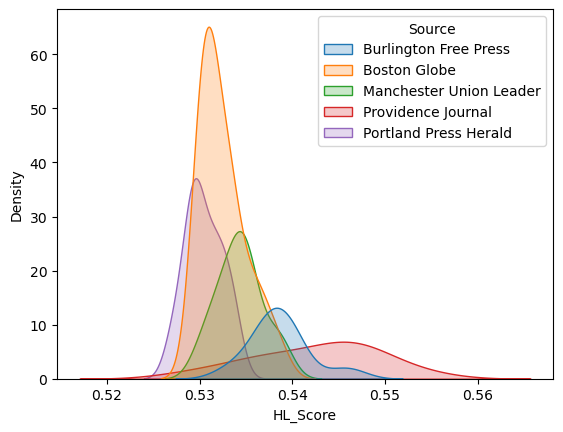

In [31]:
#Here we plot the sentiment score for New England Headlines
sns.kdeplot(data=ne, x="HL_Score", hue="Source",  fill=True)

plt.show()

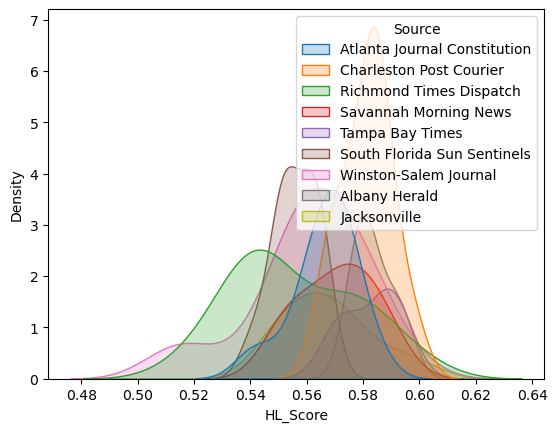

In [32]:
#Here we plot the sentiment score for Lower Atlantic Headlines
sns.kdeplot(data=la, x="HL_Score", hue="Source",  fill=True)

plt.show()

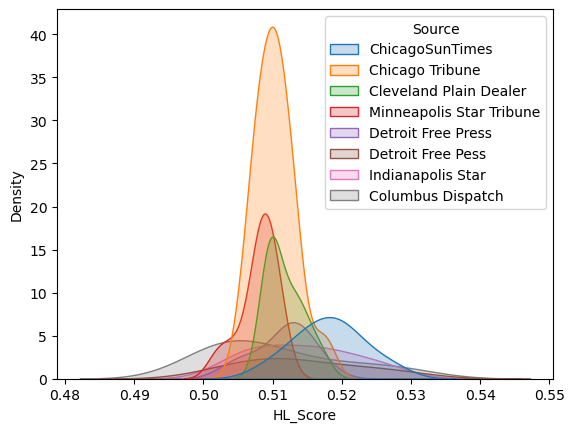

In [33]:
#Here we plot the sentiment score for the Mid West
sns.kdeplot(data=mw, x="HL_Score", hue="Source",  fill=True)

plt.show()

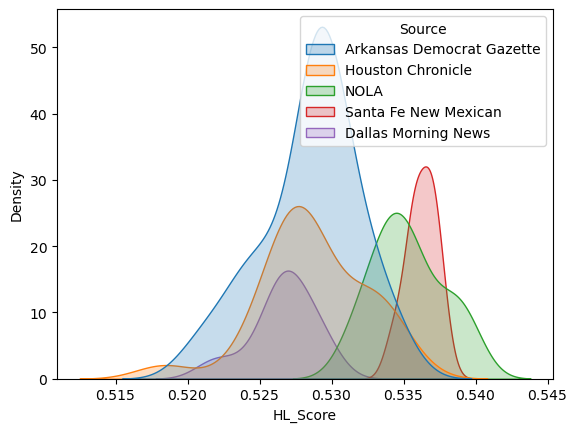

In [34]:
#Here we plot the sentiment score for Gulf Coast Headlines
sns.kdeplot(data=gc, x="HL_Score", hue="Source",  fill=True)

plt.show()

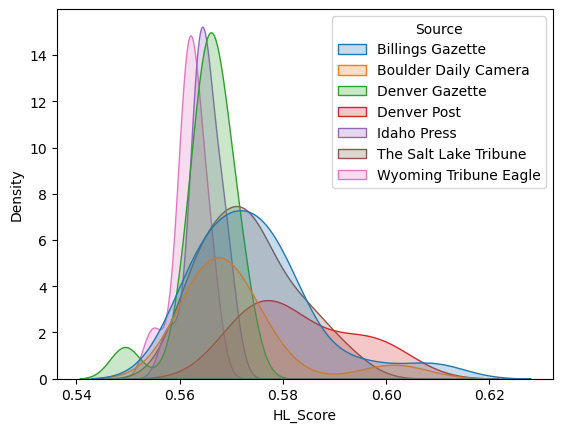

In [35]:
#Here we plot the sentiment score for Rocky Mountains Headlines
sns.kdeplot(data=rm, x="HL_Score", hue="Source",  fill=True)

plt.show()

C:\Users\t_jud\AppData\Local\Temp\ipykernel_22796\1310902066.py:1: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=ma, x="HL_Score", hue="Source",  fill=True)


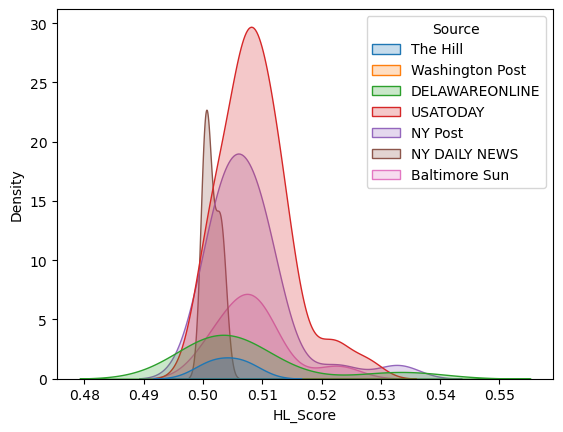

In [36]:
#Here we plot the sentiment score for Mid Atlantic Headlines
sns.kdeplot(data=ma, x="HL_Score", hue="Source",  fill=True)

plt.show()

C:\Users\t_jud\AppData\Local\Temp\ipykernel_22796\2286547574.py:1: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=wc, x="HL_Score", hue="Source",  fill=True)


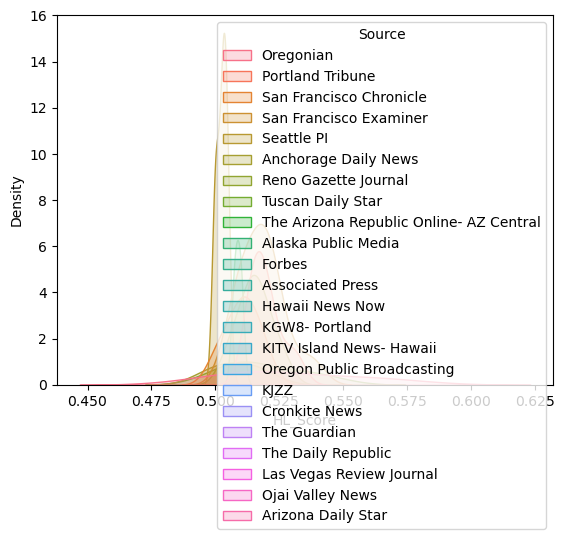

In [37]:
#Here we plot the sentiment score for West Coast Headlines
sns.kdeplot(data=wc, x="HL_Score", hue="Source",  fill=True)

plt.show()

In [38]:
from transformers import AutoTokenizer, TFAutoModelForSequenceClassification,  pipeline
model_name = "allenai/longformer-base-4096"
model= TFAutoModelForSequenceClassification.from_pretrained(model_name)

Some layers from the model checkpoint at allenai/longformer-base-4096 were not used when initializing TFLongformerForSequenceClassification: ['lm_head']
- This IS expected if you are initializing TFLongformerForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFLongformerForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some layers of TFLongformerForSequenceClassification were not initialized from the model checkpoint at allenai/longformer-base-4096 and are newly initialized: ['classifier']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [39]:
#Using allenai/longformer we perform sentiment analysis for each article, creating columns for the label and score
model_name = "allenai/longformer-base-4096"
model= TFAutoModelForSequenceClassification.from_pretrained(model_name)


tokenizer= AutoTokenizer.from_pretrained(model_name)
classifier = pipeline('sentiment-analysis', model=model, tokenizer=tokenizer)

ne['sentiment']=ne['Article'].apply(lambda Article: classifier(Article))
#We convert the sentiment to a string
ne['sentiment'] = ne['sentiment'].astype("string")


#we removed unneeded characters
ne["sentiment"]=ne.sentiment.str.replace('[', '')
ne["sentiment"]=ne.sentiment.str.replace(']', '')
ne["sentiment"]=ne.sentiment.str.replace('{', '')
ne["sentiment"]=ne.sentiment.str.replace('}', '')
ne["sentiment"]=ne.sentiment.str.replace("'label':", '')
ne["sentiment"]=ne.sentiment.str.replace("'score':", '')
ne["sentiment"]=ne.sentiment.str.replace("'LABEL_", '')
ne["sentiment"]=ne.sentiment.str.replace("'", '')

#We split the strings into seperate columns in an new dataframe and then concat them onto the original dataframe
fixxne= ne['sentiment'].str.split(",",expand=True)
fixxne.rename(columns= {0 :'A_Label',1:"A_Score"}, inplace = True)
ne= pd.concat([ne,fixxne], axis =1,)

#We then drop the columns we don't need
ne.drop('sentiment', axis = 1, inplace = True)
#Next we convert the label and score back to an int and a float
ne['A_Label'] = ne['A_Label'].astype("int")
ne['A_Score'] = ne['A_Score'].astype("float")

Some layers from the model checkpoint at allenai/longformer-base-4096 were not used when initializing TFLongformerForSequenceClassification: ['lm_head']
- This IS expected if you are initializing TFLongformerForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFLongformerForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some layers of TFLongformerForSequenceClassification were not initialized from the model checkpoint at allenai/longformer-base-4096 and are newly initialized: ['classifier']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
C:\Users\t_jud\AppData\Local\Temp\ipykernel_22796\876

In [40]:
#Using allenai/longformer we perform sentiment analysis for each article, creating columns for the label and score
model_name = "allenai/longformer-base-4096"
model= TFAutoModelForSequenceClassification.from_pretrained(model_name)

la['sentiment']=la['Article'].apply(lambda Article: classifier(Article))
#We convert the sentiment to a string
la['sentiment'] = la['sentiment'].astype("string")


#we removed unneeded characters
la["sentiment"]=la.sentiment.str.replace('[', '')
la["sentiment"]=la.sentiment.str.replace(']', '')
la["sentiment"]=la.sentiment.str.replace('{', '')
la["sentiment"]=la.sentiment.str.replace('}', '')
la["sentiment"]=la.sentiment.str.replace("'label':", '')
la["sentiment"]=la.sentiment.str.replace("'score':", '')
la["sentiment"]=la.sentiment.str.replace("'LABEL_", '')
la["sentiment"]=la.sentiment.str.replace("'", '')

#We split the strings into seperate columns in an new dataframe and then concat them onto the original dataframe
fixxla= la['sentiment'].str.split(",",expand=True)
fixxla.rename(columns= {0 :'A_Label',1:"A_Score"}, inplace = True)
la= pd.concat([la,fixxla], axis =1,)

#We then drop the columns we don't need
la.drop('sentiment', axis = 1, inplace = True)
#Next we convert the label and score back to an int and a float
la['A_Label'] = la['A_Label'].astype("int")
la['A_Score'] = la['A_Score'].astype("float")

Some layers from the model checkpoint at allenai/longformer-base-4096 were not used when initializing TFLongformerForSequenceClassification: ['lm_head']
- This IS expected if you are initializing TFLongformerForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFLongformerForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some layers of TFLongformerForSequenceClassification were not initialized from the model checkpoint at allenai/longformer-base-4096 and are newly initialized: ['classifier']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
C:\Users\t_jud\AppData\Local\Temp\ipykernel_22796\108

In [41]:
#Using allenai/longformer we perform sentiment analysis for each article, creating columns for the label and score
model_name = "allenai/longformer-base-4096"
model= TFAutoModelForSequenceClassification.from_pretrained(model_name)

mw['sentiment']=mw['Article'].apply(lambda Article: classifier(Article))
#We convert the sentiment to a string
mw['sentiment'] = mw['sentiment'].astype("string")


#we removed unneeded characters
mw["sentiment"]=mw.sentiment.str.replace('[', '')
mw["sentiment"]=mw.sentiment.str.replace(']', '')
mw["sentiment"]=mw.sentiment.str.replace('{', '')
mw["sentiment"]=mw.sentiment.str.replace('}', '')
mw["sentiment"]=mw.sentiment.str.replace("'label':", '')
mw["sentiment"]=mw.sentiment.str.replace("'score':", '')
mw["sentiment"]=mw.sentiment.str.replace("'LABEL_", '')
mw["sentiment"]=mw.sentiment.str.replace("'", '')

#We split the strings into seperate columns in an new dataframe and then concat them onto the original dataframe
fixxmw= mw['sentiment'].str.split(",",expand=True)
fixxmw.rename(columns= {0 :'A_Label',1:"A_Score"}, inplace = True)
mw= pd.concat([mw,fixxmw], axis =1,)

#We then drop the columns we don't need
mw.drop('sentiment', axis = 1, inplace = True)
#Next we convert the label and score back to an int and a float
mw['A_Label'] = mw['A_Label'].astype("int")
mw['A_Score'] = mw['A_Score'].astype("float")


Some layers from the model checkpoint at allenai/longformer-base-4096 were not used when initializing TFLongformerForSequenceClassification: ['lm_head']
- This IS expected if you are initializing TFLongformerForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFLongformerForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some layers of TFLongformerForSequenceClassification were not initialized from the model checkpoint at allenai/longformer-base-4096 and are newly initialized: ['classifier']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
C:\Users\t_jud\AppData\Local\Temp\ipykernel_22796\143

In [42]:
#Using allenai/longformer we perform sentiment analysis for each article, creating columns for the label and score
model_name = "allenai/longformer-base-4096"
model= TFAutoModelForSequenceClassification.from_pretrained(model_name)

gc['sentiment']=gc['Article'].apply(lambda Article: classifier(Article))
#We convert the sentiment to a string
gc['sentiment'] = gc['sentiment'].astype("string")


#we removed unneeded characters
gc["sentiment"]=gc.sentiment.str.replace('[', '')
gc["sentiment"]=gc.sentiment.str.replace(']', '')
gc["sentiment"]=gc.sentiment.str.replace('{', '')
gc["sentiment"]=gc.sentiment.str.replace('}', '')
gc["sentiment"]=gc.sentiment.str.replace("'label':", '')
gc["sentiment"]=gc.sentiment.str.replace("'score':", '')
gc["sentiment"]=gc.sentiment.str.replace("'LABEL_", '')
gc["sentiment"]=gc.sentiment.str.replace("'", '')

#We split the strings into seperate columns in an new dataframe and then concat them onto the original dataframe
fixxgc= gc['sentiment'].str.split(",",expand=True)
fixxgc.rename(columns= {0 :'A_Label',1:"A_Score"}, inplace = True)
gc= pd.concat([gc,fixxgc], axis =1,)

#We then drop the columns we don't need
gc.drop('sentiment', axis = 1, inplace = True)
#Next we convert the label and score back to an int and a float
gc['A_Label'] = gc['A_Label'].astype("int")
gc['A_Score'] = gc['A_Score'].astype("float")

Some layers from the model checkpoint at allenai/longformer-base-4096 were not used when initializing TFLongformerForSequenceClassification: ['lm_head']
- This IS expected if you are initializing TFLongformerForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFLongformerForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some layers of TFLongformerForSequenceClassification were not initialized from the model checkpoint at allenai/longformer-base-4096 and are newly initialized: ['classifier']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
C:\Users\t_jud\AppData\Local\Temp\ipykernel_22796\233

In [43]:
#Using allenai/longformer we perform sentiment analysis for each article, creating columns for the label and score
model_name = "allenai/longformer-base-4096"
model= TFAutoModelForSequenceClassification.from_pretrained(model_name)

rm['sentiment']=rm['Article'].apply(lambda Article: classifier(Article))
#We convert the sentiment to a string
rm['sentiment'] = rm['sentiment'].astype("string")


#we removed unneeded characters
rm["sentiment"]=rm.sentiment.str.replace('[', '')
rm["sentiment"]=rm.sentiment.str.replace(']', '')
rm["sentiment"]=rm.sentiment.str.replace('{', '')
rm["sentiment"]=rm.sentiment.str.replace('}', '')
rm["sentiment"]=rm.sentiment.str.replace("'label':", '')
rm["sentiment"]=rm.sentiment.str.replace("'score':", '')
rm["sentiment"]=rm.sentiment.str.replace("'LABEL_", '')
rm["sentiment"]=rm.sentiment.str.replace("'", '')

#We split the strings into seperate columns in an new dataframe and then concat them onto the original dataframe
fixxrm= rm['sentiment'].str.split(",",expand=True)
fixxrm.rename(columns= {0 :'A_Label',1:"A_Score"}, inplace = True)
rm= pd.concat([rm,fixxrm], axis =1,)

#We then drop the columns we don't need
rm.drop('sentiment', axis = 1, inplace = True)
#Next we convert the label and score back to an int and a float
rm['A_Label'] = rm['A_Label'].astype("int")
rm['A_Score'] = rm['A_Score'].astype("float")

Some layers from the model checkpoint at allenai/longformer-base-4096 were not used when initializing TFLongformerForSequenceClassification: ['lm_head']
- This IS expected if you are initializing TFLongformerForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFLongformerForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some layers of TFLongformerForSequenceClassification were not initialized from the model checkpoint at allenai/longformer-base-4096 and are newly initialized: ['classifier']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
C:\Users\t_jud\AppData\Local\Temp\ipykernel_22796\375

In [44]:
#Using allenai/longformer we perform sentiment analysis for each article, creating columns for the label and score
model_name = "allenai/longformer-base-4096"
model= TFAutoModelForSequenceClassification.from_pretrained(model_name)


ma['sentiment']=ma['Article'].apply(lambda Article: classifier(Article))
#We convert the sentiment to a string
ma['sentiment'] = ma['sentiment'].astype("string")


#we removed unneeded characters
ma["sentiment"]=ma.sentiment.str.replace('[', '')
ma["sentiment"]=ma.sentiment.str.replace(']', '')
ma["sentiment"]=ma.sentiment.str.replace('{', '')
ma["sentiment"]=ma.sentiment.str.replace('}', '')
ma["sentiment"]=ma.sentiment.str.replace("'label':", '')
ma["sentiment"]=ma.sentiment.str.replace("'score':", '')
ma["sentiment"]=ma.sentiment.str.replace("'LABEL_", '')
ma["sentiment"]=ma.sentiment.str.replace("'", '')

#We split the strings into seperate columns in an new dataframe and then concat them onto the original dataframe
fixxma= ma['sentiment'].str.split(",",expand=True)
fixxma.rename(columns= {0 :'A_Label',1:"A_Score"}, inplace = True)
ma= pd.concat([ma,fixxma], axis =1,)

#We then drop the columns we don't need
ma.drop('sentiment', axis = 1, inplace = True)
#Next we convert the label and score back to an int and a float
ma['A_Label'] = ma['A_Label'].astype("int")
ma['A_Score'] = ma['A_Score'].astype("float")

Some layers from the model checkpoint at allenai/longformer-base-4096 were not used when initializing TFLongformerForSequenceClassification: ['lm_head']
- This IS expected if you are initializing TFLongformerForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFLongformerForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some layers of TFLongformerForSequenceClassification were not initialized from the model checkpoint at allenai/longformer-base-4096 and are newly initialized: ['classifier']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
C:\Users\t_jud\AppData\Local\Temp\ipykernel_22796\155

In [45]:
#Using allenai/longformer we perform sentiment analysis for each article, creating columns for the label and score
model_name = "allenai/longformer-base-4096"
model= TFAutoModelForSequenceClassification.from_pretrained(model_name)

wc['sentiment']=wc['Article'].apply(lambda Article: classifier(Article))
#weconvert the sentiment to a string
wc['sentiment'] = wc['sentiment'].astype("string")


#we removed unneeded characters
wc["sentiment"]=wc.sentiment.str.replace('[', '')
wc["sentiment"]=wc.sentiment.str.replace(']', '')
wc["sentiment"]=wc.sentiment.str.replace('{', '')
wc["sentiment"]=wc.sentiment.str.replace('}', '')
wc["sentiment"]=wc.sentiment.str.replace("'label':", '')
wc["sentiment"]=wc.sentiment.str.replace("'score':", '')
wc["sentiment"]=wc.sentiment.str.replace("'LABEL_", '')
wc["sentiment"]=wc.sentiment.str.replace("'", '')

#We split the strings into seperate columns in an new dataframe and then concat them onto the original dataframe
fixxwc= wc['sentiment'].str.split(",",expand=True)
fixxwc.rename(columns= {0 :'A_Label',1:"A_Score"}, inplace = True)
wc= pd.concat([wc,fixxwc], axis =1,)

#We then drop the columns we don't need
wc.drop('sentiment', axis = 1, inplace = True)
#Next we convert the label and score back to an int and a float
wc['A_Label'] = wc['A_Label'].astype("int")
wc['A_Score'] = wc['A_Score'].astype("float")

Some layers from the model checkpoint at allenai/longformer-base-4096 were not used when initializing TFLongformerForSequenceClassification: ['lm_head']
- This IS expected if you are initializing TFLongformerForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFLongformerForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some layers of TFLongformerForSequenceClassification were not initialized from the model checkpoint at allenai/longformer-base-4096 and are newly initialized: ['classifier']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
C:\Users\t_jud\AppData\Local\Temp\ipykernel_22796\236

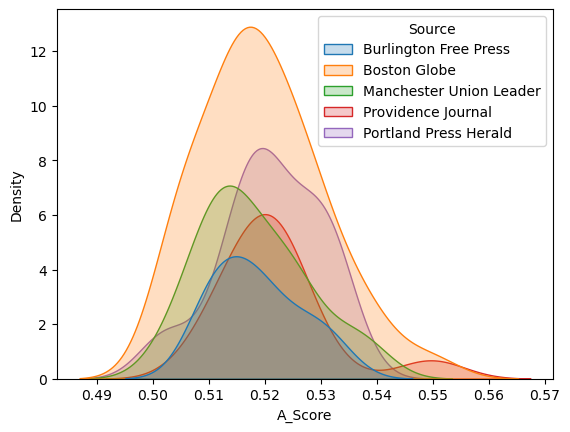

In [46]:
#Here we plot the sentiment score for New England Articles
sns.kdeplot(data=ne, x="A_Score", hue="Source",  fill=True)

plt.show()

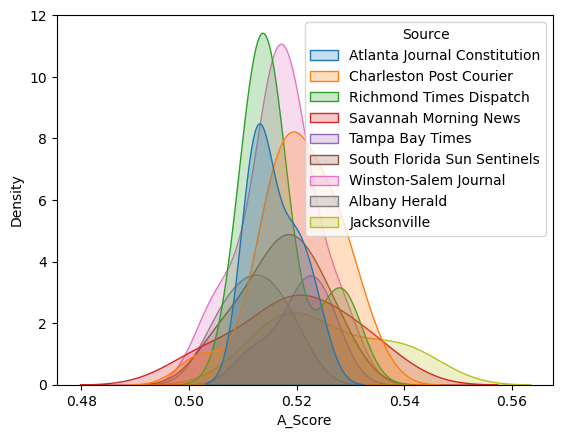

In [47]:
#We plot the sentimentality score for Lower Atlantic Articles
sns.kdeplot(data=la, x="A_Score", hue="Source",  fill=True)

plt.show()

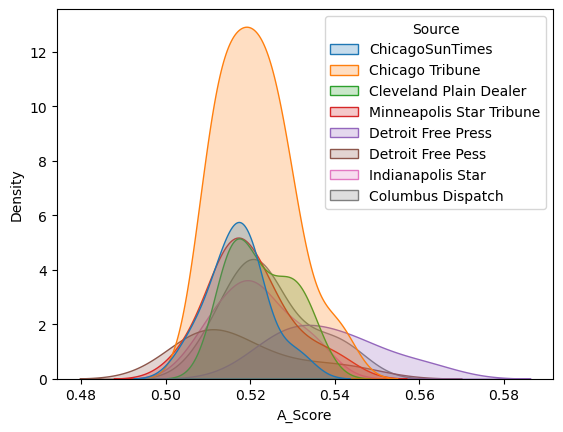

In [48]:
#We plot the sentimentality score for The Mid West Articles
sns.kdeplot(data=mw, x="A_Score", hue="Source",  fill=True)

plt.show()

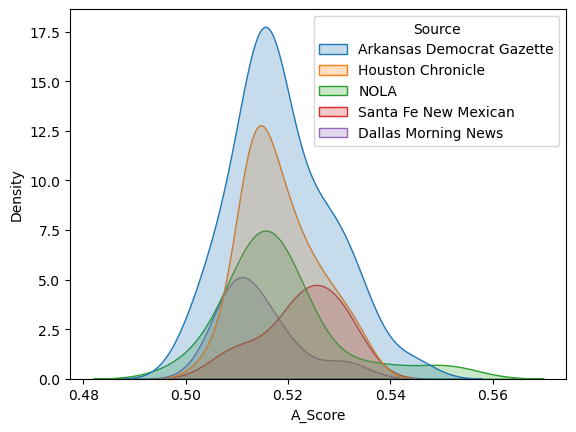

In [49]:
#Here we plot the sentiment of Gulf Coast Articles
sns.kdeplot(data=gc, x="A_Score", hue="Source",  fill=True)

plt.show()

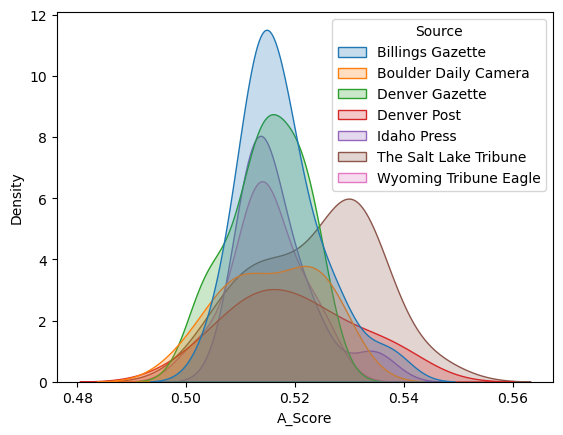

In [50]:
#Here We plot the sentiment of Rocky Mountain Articles
sns.kdeplot(data=rm, x="A_Score", hue="Source",  fill=True)

plt.show()

C:\Users\t_jud\AppData\Local\Temp\ipykernel_22796\1831786153.py:1: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=ma, x="A_Score", hue="Source",  fill=True)


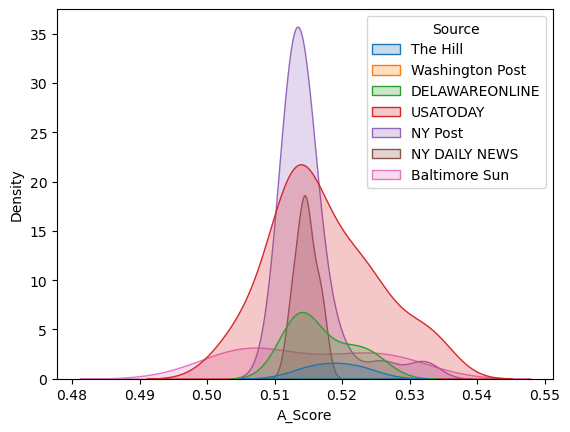

In [51]:
#Here we plot the sentiment of Mid Atlantic Articles
sns.kdeplot(data=ma, x="A_Score", hue="Source",  fill=True)

plt.show()

C:\Users\t_jud\AppData\Local\Temp\ipykernel_22796\4252650248.py:1: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=wc, x="A_Score", hue="Source",  fill=True)


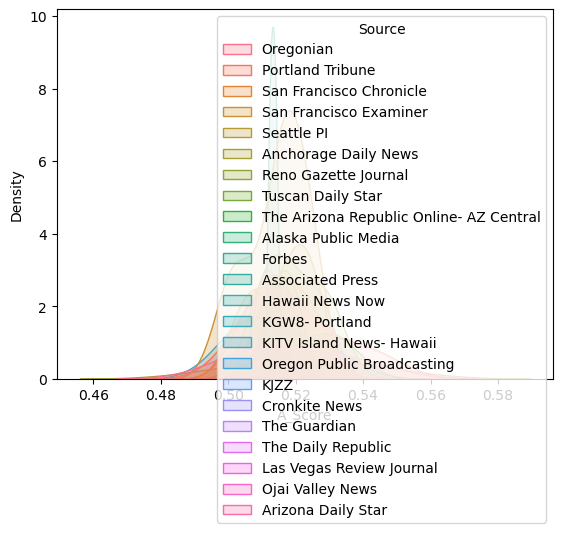

In [52]:
#Here We plot the Sentiment of West Coast Articles
sns.kdeplot(data=wc, x="A_Score", hue="Source",  fill=True)

plt.show()

In [53]:
#We then combine the regions into a single national dataframe
ne = ne.append(la, ignore_index=True)
ne = ne.append(mw, ignore_index=True)
ne = ne.append(gc, ignore_index=True)
ne = ne.append(rm, ignore_index=True)
ne = ne.append(ma, ignore_index=True)
df = ne.append(wc, ignore_index=True)

In [54]:
#Next we rearragne the columns in order to make the dataframe easier to understand
df = df[["Source","Head_Line","Article","Region","Polarity","Subjectivity","HL_Label","HL_Score","A_Label","A_Score"]]

In [55]:
#we check the head
df.head(360)

,Source,Head_Line,Article,Region,Polarity,Subjectivity,HL_Label,HL_Score,A_Label,A_Score
0,Burlington Free Press,Plugging into change: Electric vehicle chargin...,A statewide push to bring more chargers for Ve...,New England,0.103902,0.267923,1,0.536900,1,0.518086
1,Burlington Free Press,Now's your chance to find out what it's like t...,Ever wonder what it's like to drive an electri...,New England,0.098703,0.461628,1,0.538984,1,0.516843
2,Burlington Free Press,Efficiency Vermont turns its attention to elec...,Efficiency Vermont plans to do for electric ve...,New England,0.137987,0.378211,1,0.536595,1,0.531768
3,Burlington Free Press,Electric cars: Sweet ride or sacred cow?,"Ordinarily, electric and gas-electric hybrid c...",New England,0.100955,0.442225,1,0.539523,1,0.520134
4,Burlington Free Press,Electric vehicles no green solution,I'd like to thank the Free Press for printing ...,New England,0.105746,0.536844,1,0.539903,1,0.511199
...,...,...,...,...,...,...,...,...,...,...
355,Houston Chronicle,Program introduces electric rental cars in Orl...,This is a carousel. Use Next and Previous butt...,Gulf Coast,0.167463,0.430676,1,0.524162,1,0.519065
356,Houston Chronicle,'Electric Highway' on the way,This is a carousel. Use Next and Previous butt...,Gulf Coast,0.093358,0.349172,1,0.526752,1,0.513097
357,NOLA,Electric cars in New Orleans | News | Gambit W...,Matt Wisdom says he prefers his Tesla to other...,Gulf Coast,0.196168,0.462683,1,0.533167,1,0.517227
358,NOLA,Opinions and Editorials | NOLA.com | nola.com,If you want a bottom-line indicator of economi...,Gulf Coast,0.012307,0.406999,1,0.531817,1,0.513699


In [57]:
!pip install gensim

In [58]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\t_jud\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [59]:
import gensim.downloader as api
from gensim.corpora import Dictionary
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.tokenize import RegexpTokenizer
from gensim.parsing.preprocessing import remove_stopwords, preprocess_string
from nltk.corpus import stopwords
from  gensim.models import CoherenceModel
from nltk.corpus import stopwords
from gensim.utils import simple_preprocess

C:\Users\t_jud\anaconda3\lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


In [60]:
#Next we convert the articles into a list for Topic Modeling
docs= df['Article'].tolist()
print(len(docs))

656


In [61]:
#Next we define the stop words
stop_words=stopwords.words('english')

In [62]:
#We append the stop words from nltk with stop words that are relavent to our study
stop_words.extend(["link","message","inbox","in","that","but","shall","and","publication","rewritten","photo","press","subcribe","subscription","if",
       "all","get","gazette","broadcast","inc","published","email","or","reserved","redistributed","ap","copyright",'audio',"account",
       "your","sent","delivered","you","password","send","an","no","secure","logged","thank","mail","list","cancel","invalid","form","secure",
        "work","company","day","jacksonville","two","business","park","need","project","news","every","area","herald"])

In [63]:
#We toeknize and lower case all the words in the documents
tokenizer= RegexpTokenizer(r'\w+')
for idx in range (len(docs)):
    docs[idx] = docs[idx].lower()
    docs[idx] = tokenizer.tokenize(docs[idx])

In [64]:
#We Define a function to to remove stop words from the docs
def remove_stopwords(texts):

    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

In [65]:
#we remove the stop words from the docs
docs = remove_stopwords(docs)

In [66]:
#Next we remove all non alpha numeric characters from the docs
docs = [[token for token in doc if not token.isnumeric()] for doc in docs]

In [67]:
#Then we remove all single character tokens from the docs
docs = [[token for token in doc if  len(token) > 1]for doc in docs]

In [68]:
#THe Next step is to lemmatize the words so that they are
lemmatizer = WordNetLemmatizer()
docs = [[lemmatizer.lemmatize(token) for token in doc] for doc in docs]

In [69]:
#Next we append bigrams that appear more than twenty times to the docs

from gensim.models import Phrases

bigram = Phrases(docs, min_count=20)
for idx in range (len(docs)):
    for token in bigram[docs[idx]]:
        if '_' in token:
            docs[idx].append(token)

In [70]:
#Next we create the dictionary
dictionary = Dictionary(docs)

dictionary.filter_extremes(no_below=20)

In [71]:
#Next we create the corpus, changing each doc into a bag of words
corpus=[dictionary.doc2bow(doc) for doc in docs]

In [72]:
#In order to find the correct number of topics for our LDA we are going to look at the log perplexity and the coherence score of LDA
#models with different numbers of topics. We look at Log Perplexity first.

#To test Models with different Numbers of topic we will use a for loop with a range where i in the range is the number of topics.
#Each time it runs it will append the log peroplexity and the number of topics to lists
from gensim.models import LdaModel


topics=[]
perp=[]
number_of_words = sum(cnt for document in corpus for _, cnt in document)
for i in range(2, 42):
    model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=i, iterations=100)
    perplexity=model.log_perplexity(corpus)
    perp.append(perplexity)
    topics.append(i)

In [73]:
#We convert the Topic and log perplexity lists into a dataframe
Gdf = pd.DataFrame({"Topics":topics,"Log_Perplexity":perp})

<Axes: xlabel='Topics'>

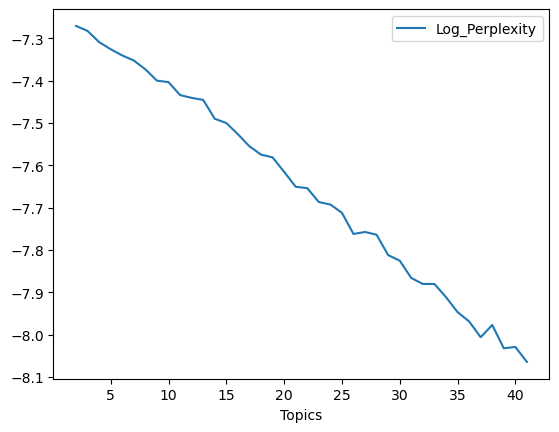

In [74]:
#Next we plot the log perplexity
Gdf.plot(x="Topics",y="Log_Perplexity")

In [75]:
#Similarly to what we did with log perplexity, in order to find the cohernce of models with different numbers of topics, we will use a for loop with a
#range where the range is the amount of topics we want to test.

temp= dictionary[0]
id2word= dictionary.id2token

tops = []
coh_score = []
for i in range(2,42):
    lda_model = LdaModel(corpus=corpus, id2word=id2word,iterations=20, passes=100, num_topics=i)
    cmodel= CoherenceModel(model=lda_model, corpus=corpus, coherence="u_mass")
    coh = cmodel.get_coherence()
    tops.append(i)
    coh_score.append(coh)
    

In [76]:
#We convert the coherence scores into a dataframe in order to make it easier to work with
Cdf = pd.DataFrame({"Topics":tops,"Coherence":coh_score})

<Axes: xlabel='Topics'>

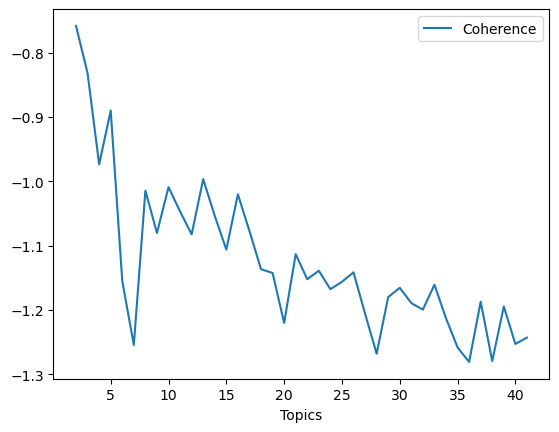

In [77]:
#Next we plot the coherence scores
Cdf.plot(x="Topics",y="Coherence")

In [135]:
#Next I Check the highest Coherence scores
Cdf.head()

,Topics,Coherence
0,2,-0.758385
1,3,-0.831967
2,4,-0.973567
3,5,-0.889886
4,6,-1.154830


In [97]:
#Having Determined the Correct number of topics we create our LDA model. 
# We learned how to create this model using the tutorial in the Gensim documentation at
#https://radimrehurek.com/gensim/auto_examples/tutorials/run_lda.html#sphx-glr-auto-examples-tutorials-run-lda-py

from gensim.models import LdaModel

num_topics=2
chunksize=2000
passes=100
iterations=50
eval_every=None

temp= dictionary[0]
id2word= dictionary.id2token

model= LdaModel(
    corpus=corpus,
    id2word=id2word,
    chunksize=chunksize,
    alpha='auto',
    eta='auto',
    iterations=iterations,
    num_topics=num_topics,
    passes=passes,
    eval_every=eval_every
)

In [92]:
!pip install pyldavis

In [93]:
#In order to get a quick visual representation of the topics we use pyLDAvis
import pyLDAvis.gensim
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(model,corpus, dictionary=dictionary)
vis

C:\Users\t_jud\anaconda3\lib\site-packages\pyLDAvis\_prepare.py:243: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x    y  topics  cluster       Freq
topic                                           
1      0.078224  0.0       1        1  53.373423
0     -0.078224  0.0       2        1  46.626577, topic_info=                  Term         Freq        Total Category  logprob  loglift
584             credit   941.000000   941.000000  Default  30.0000  30.0000
621              model   929.000000   929.000000  Default  29.0000  29.0000
1239         automaker   590.000000   590.000000  Default  28.0000  28.0000
631              price  1005.000000  1005.000000  Default  27.0000  27.0000
17    charging_station   945.000000   945.000000  Default  26.0000  26.0000
...                ...          ...          ...      ...      ...      ...
2            according   328.578311   644.736172   Topic2  -5.7552   0.0889
57                 may   324.280137   645.728819   Topic2  -5.7684   0.0742
720               next   313.243187   575.396961   Topic2  -5.8030   0.1549
821               part   306.281855   580.353578   Topic2  -5.8255   0.1239
138                 le   304.915350   500.110515   Topic2  -5.8299   0.2682

[188 rows x 6 columns], token_table=      Topic      Freq           Term
term                                
2         1  0.490123      according
2         2  0.510286      according
667       1  0.868474            air
667       2  0.132255            air
886       1  0.997213  air_pollution
...     ...       ...            ...
97        2  0.109077        utility
98        1  0.987968        vermont
98        2  0.010857        vermont
851       1  0.013203        version
851       2  0.983661        version

[310 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 1])

In [94]:
#Next We Check the Log Perplexity of the model
Pscore=model.log_perplexity(corpus)
print(Pscore)

-7.194159388180369


In [95]:
#Next we Check the Chorence score for the model
cm=CoherenceModel(model=model,corpus=corpus, dictionary=dictionary, coherence='u_mass')
coherence=cm.get_coherence()

In [96]:
print(coherence)

-0.7369626473127482


In [126]:
#Next we will add the topics for the individual documents to the original dataframe.
#First we get the topics using .get_document_topics
#Next we turn them into a dataframe

dTopics=model.get_document_topics(corpus, minimum_probability=None, minimum_phi_value=None, per_word_topics=False)
GTopicdf = pd.DataFrame({"Topics":dTopics})

In [127]:
#The Next step is to convert the topics into strings
GTopicdf["Topics"]=GTopicdf["Topics"].astype(str)

In [128]:
#Next we remove the parenthesis
GTopicdf["Topics"]=GTopicdf.Topics.str.replace('(', '')
GTopicdf["Topics"]=GTopicdf.Topics.str.replace(')', '')


C:\Users\t_jud\AppData\Local\Temp\ipykernel_22796\85410447.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  GTopicdf["Topics"]=GTopicdf.Topics.str.replace('(', '')
C:\Users\t_jud\AppData\Local\Temp\ipykernel_22796\85410447.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  GTopicdf["Topics"]=GTopicdf.Topics.str.replace(')', '')


In [129]:
#For the Next step we split the topic at the comma
GTopicdf=GTopicdf['Topics'].str.split(",",expand=True)

In [130]:
#Next we rename the column to Primary Topic and remove the bracket
GTopicdf.rename(columns = {0:"Primary_Topic"} ,inplace = True)
GTopicdf["Primary_Topic"]=GTopicdf.Primary_Topic.str.replace('[', '')

C:\Users\t_jud\AppData\Local\Temp\ipykernel_22796\1544615532.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  GTopicdf["Primary_Topic"]=GTopicdf.Primary_Topic.str.replace('[', '')


In [131]:
#We then drop the columns we do not neeed
GTopicdf.drop(1,axis = 1, inplace = True)
GTopicdf.drop(2,axis = 1, inplace = True)
GTopicdf.drop(3,axis = 1, inplace = True)


In [136]:
#Now we attach a title word to each topic

GTopicdf["Primary_Topic"]=GTopicdf.Primary_Topic.str.replace('0', '0: None')
GTopicdf["Primary_Topic"]=GTopicdf.Primary_Topic.str.replace('1', '1: Charging Station')
GTopicdf["Primary_Topic"]=GTopicdf.Primary_Topic.str.replace('2', '2: cost/tax credit')


In [138]:
#next we split the topic into two columns and rename the columns
GTopicdf=GTopicdf['Primary_Topic'].str.split(":",expand=True)

GTopicdf.rename(columns = {0:"Topic"} ,inplace = True)
GTopicdf.rename(columns = {1:"Primary_Topic"} ,inplace = True)

In [140]:
#next we merge the topics with the original dataframe
df=pd.merge(df, GTopicdf, left_index=True, right_index=True)

In [141]:
df.head()

,Source,Head_Line,Article,Region,Polarity,Subjectivity,HL_Label,HL_Score,A_Label,A_Score,Topic,Primary_Topic
0,Burlington Free Press,Plugging into change: Electric vehicle chargin...,A statewide push to bring more chargers for Ve...,New England,0.103902,0.267923,1,0.536900,1,0.518086,1,Charging Station
1,Burlington Free Press,Now's your chance to find out what it's like t...,Ever wonder what it's like to drive an electri...,New England,0.098703,0.461628,1,0.538984,1,0.516843,0,None
2,Burlington Free Press,Efficiency Vermont turns its attention to elec...,Efficiency Vermont plans to do for electric ve...,New England,0.137987,0.378211,1,0.536595,1,0.531768,1,Charging Station
3,Burlington Free Press,Electric cars: Sweet ride or sacred cow?,"Ordinarily, electric and gas-electric hybrid c...",New England,0.100955,0.442225,1,0.539523,1,0.520134,0,None
4,Burlington Free Press,Electric vehicles no green solution,I'd like to thank the Free Press for printing ...,New England,0.105746,0.536844,1,0.539903,1,0.511199,0,None


In [142]:
df.to_csv('National_TopicModel.csv', index= False)